In [1]:
DRAW = True

## Dev parameters

In [2]:
import sys
sys.path.insert(1, '../')

# get trainer.
from src.Trainer import Trainer

2023-08-13 17:07:12.404374: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-13 17:07:12.461680: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-13 17:07:12.470534: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-13 17:07:13.505559: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# IMPORTS

In [3]:
# data visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# confere data.
import sklearn.metrics
import cv2
import natsort

# logger.
import pickle
import mlflow

# DATASETs

In [4]:
# separate datasets.
trainer = Trainer()
[train_set, val_set] = trainer.train_val_split(augment=True)

Found 892 images belonging to 2 classes.
Training set:
 {'0_utilizavel': 0, '1_defeituoso': 1}
Found 222 images belonging to 2 classes.

Validation set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


# FP MODEL

## Train

In [5]:
trainer.build_fp_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 2)       20        
                                                                 
 average_pooling2d (Average  (None, 64, 64, 2)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 4)         76        
                                                                 
 average_pooling2d_1 (Avera  (None, 32, 32, 4)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 8)         296       
                                                                 
 average_pooling2d_2 (Avera  (None, 16, 16, 8)         0

In [6]:
trainer.training_loop()

2023/08/13 17:07:16 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.
2023/08/13 17:07:16 WARNING mlflow.tensorflow: Unrecognized dataset type <class 'keras.src.preprocessing.image.DirectoryIterator'>. Dataset logging skipped.


Epoch 1/50
56/56 - 5s - loss: 0.6472 - recall: 0.9328 - binary_accuracy: 0.6143 - precision: 0.6188 - false_negatives: 36.0000 - false_positives: 308.0000 - val_loss: 0.6117 - val_recall: 0.8284 - val_binary_accuracy: 0.7072 - val_precision: 0.7255 - val_false_negatives: 23.0000 - val_false_positives: 42.0000 - 5s/epoch - 94ms/step
Epoch 2/50


/home/vuser/Documents/backup_07302023/3_tcc_code/ML_IoT_pipeline/ML_IoT_pipeline/env_ML_pipeline/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


56/56 - 3s - loss: 0.5791 - recall: 0.8004 - binary_accuracy: 0.6973 - precision: 0.7247 - false_negatives: 107.0000 - false_positives: 163.0000 - val_loss: 0.5910 - val_recall: 0.8209 - val_binary_accuracy: 0.6847 - val_precision: 0.7051 - val_false_negatives: 24.0000 - val_false_positives: 46.0000 - 3s/epoch - 53ms/step
Epoch 3/50
56/56 - 3s - loss: 0.5537 - recall: 0.8097 - binary_accuracy: 0.7298 - precision: 0.7574 - false_negatives: 102.0000 - false_positives: 139.0000 - val_loss: 0.5662 - val_recall: 0.7761 - val_binary_accuracy: 0.7027 - val_precision: 0.7429 - val_false_negatives: 30.0000 - val_false_positives: 36.0000 - 3s/epoch - 52ms/step
Epoch 4/50
56/56 - 3s - loss: 0.5334 - recall: 0.8041 - binary_accuracy: 0.7478 - precision: 0.7822 - false_negatives: 105.0000 - false_positives: 120.0000 - val_loss: 0.5492 - val_recall: 0.7463 - val_binary_accuracy: 0.7387 - val_precision: 0.8065 - val_false_negatives: 34.0000 - val_false_positives: 24.0000 - 3s/epoch - 50ms/step
Epoch 

2023/08/13 17:09:36 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: '>=' not supported between instances of 'slice' and 'int'
2023/08/13 17:09:36 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: /tmp/tmp5xkrveqz/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp5xkrveqz/model/data/model/assets


In [7]:
trainer.load_model_trained()

## Results evaluation

In [8]:
# turn off data augmentation to reproducible results.
[train_set, val_set] = trainer.train_val_split(augment=False)

Found 892 images belonging to 2 classes.
Training set:
 {'0_utilizavel': 0, '1_defeituoso': 1}
Found 222 images belonging to 2 classes.

Validation set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


56/56 [==============================] - 2s 23ms/step
fp_Train_Metrics
 {'fp_Train_recall': 0.9794776119402985, 'fp_Train_acc': 0.976457399103139, 'fp_Train_precision': 0.9813084112149533}
Confusion matrix Train 
 [[346  10]
 [ 11 525]]
56/56 [==============================] - 1s 23ms/step
Errors list Train 
 ['../dataset/resize_128/train/0_utilizavel/utiliza (20).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (224).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (281).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (296).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (3).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (301).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (342).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (348).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (385).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (49).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (303).jpeg',

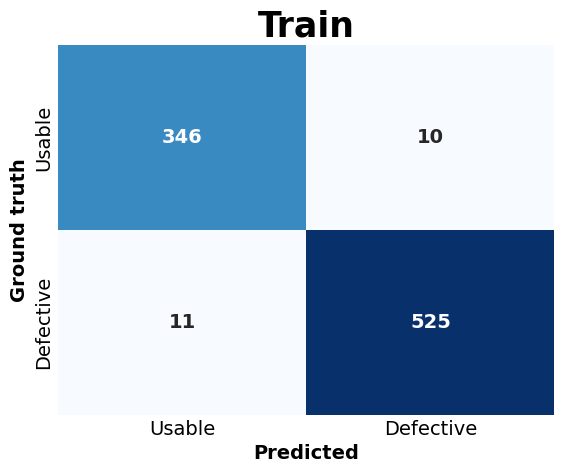

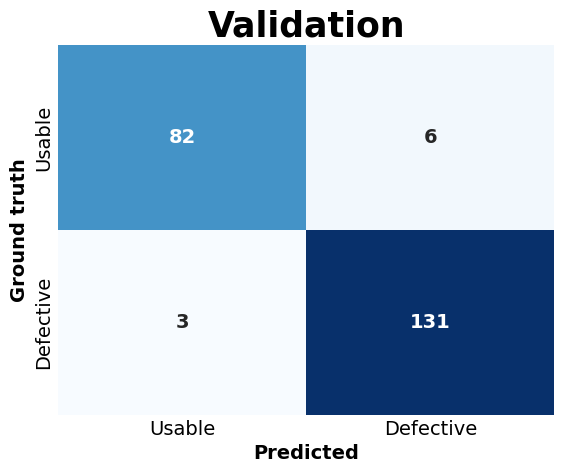

In [9]:
# get confusion matrix and wrong inferences.
trainer.init_metrics_handler()
for name, set in zip(["Train", "Validation"], [train_set, val_set]):
    trainer.get_confusion_matrix(set, name, "fp")
    trainer.get_errors(set, name, "fp", draw_errors=DRAW)

# QT MODEL

## Build

In [10]:
# build qt model.
trainer.build_qt_model()

INFO:tensorflow:Assets written to: /tmp/tmpkmy00ss4/assets


INFO:tensorflow:Assets written to: /tmp/tmpkmy00ss4/assets
/home/vuser/Documents/backup_07302023/3_tcc_code/ML_IoT_pipeline/ML_IoT_pipeline/env_ML_pipeline/lib/python3.9/site-packages/tensorflow/lite/python/convert.py:887: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
2023-08-13 17:09:49.738603: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-08-13 17:09:49.738638: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-08-13 17:09:49.739039: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpkmy00ss4
2023-08-13 17:09:49.741401: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-08-13 17:09:49.741429: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmpkmy00ss4
2023-08-13 17:09:49.746768: I tensorflow/compi

QT model detais:
input details = {'name': 'serving_default_conv2d_input:0', 'index': 0, 'shape': array([  1, 128, 128,   1], dtype=int32), 'shape_signature': array([ -1, 128, 128,   1], dtype=int32), 'dtype': <class 'numpy.int8'>, 'quantization': (1.0, -128), 'quantization_parameters': {'scales': array([1.], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}
output details = {'name': 'StatefulPartitionedCall:0', 'index': 25, 'shape': array([1, 1], dtype=int32), 'shape_signature': array([-1,  1], dtype=int32), 'dtype': <class 'numpy.int8'>, 'quantization': (0.00390625, -128), 'quantization_parameters': {'scales': array([0.00390625], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}


fully_quantize: 0, inference_type: 6, input_inference_type: INT8, output_inference_type: INT8


b' \x00\x00\x00TFL3\x00\x00\x00\x00\x14\x00 \x00\x1c\x00\x18\x00\x14\x00\x10\x00\x0c\x00\x00\x00\x08\x00\x04\x00\x14\x00\x00\x00\x1c\x00\x00\x00\x88\x00\x00\x00\xe0\x00\x00\x00\x90\x0f\x00\x00\xa0\x0f\x00\x00\x84%\x00\x00\x03\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00\xae\xef\xff\xff\x0c\x00\x00\x00\x1c\x00\x00\x008\x00\x00\x00\x0f\x00\x00\x00serving_default\x00\x01\x00\x00\x00\x04\x00\x00\x00\x94\xff\xff\xff\x19\x00\x00\x00\x04\x00\x00\x00\x05\x00\x00\x00dense\x00\x00\x00\x01\x00\x00\x00\x04\x00\x00\x00\xf6\xf0\xff\xff\x04\x00\x00\x00\x0c\x00\x00\x00conv2d_input\x00\x00\x00\x00\x02\x00\x00\x004\x00\x00\x00\x04\x00\x00\x00\xdc\xff\xff\xff\x1c\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00CONVERSION_METADATA\x00\x08\x00\x0c\x00\x08\x00\x04\x00\x08\x00\x00\x00\x1b\x00\x00\x00\x04\x00\x00\x00\x13\x00\x00\x00min_runtime_version\x00\x1d\x00\x00\x00\xac\x0e\x00\x00\xa4\x0e\x00\x00\x8c\x0e\x00\x00p\x0e\x00\x00`\n\x00\x00\x10\n\x00\x00\x80\x05\x00\x00P\x05\x00\x00\x00\x03\x00\x00\xd0\x02\x00\x00

## Compare QT and FP models

In [11]:
trainer.quantization_error(train_set)

56/56 [==============================] - 1s 25ms/step


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


qt_Metrics
 {'qt_mean': -0.012205302, 'qt_std': 0.033167828, 'qt_abs_mean': 0.016475303, 'qt_abs_std': 0.031267215}


{'diff': array([-8.86024907e-04, -8.07850063e-02, -1.42333738e-03,  1.74514600e-03,
         1.39899850e-02, -1.42704125e-03, -3.58926458e-03,  1.19900219e-02,
        -5.25409728e-03,  1.07333367e-03,  2.63225613e-03, -8.91201198e-02,
        -1.46213248e-02, -4.19415683e-02,  2.98920721e-02, -7.28674408e-04,
         3.99876758e-03, -1.03123523e-02, -5.75361028e-03, -6.47087097e-02,
        -1.22433081e-02,  1.53444614e-03,  1.84174185e-03, -7.06356764e-02,
        -5.76696992e-02, -1.98346819e-03, -3.69719565e-02,  5.39468229e-03,
        -2.88266316e-02,  4.07046638e-02,  8.02487135e-04,  9.42684710e-04,
         1.73531496e-03, -1.34564191e-02,  4.25666571e-03, -9.88627672e-02,
        -3.59304696e-02,  1.63463503e-02, -1.44565012e-04, -9.96913994e-04,
        -2.82804971e-03, -2.31637573e-03, -2.86220610e-02, -1.15630217e-04,
        -3.32921185e-03,  1.32727250e-03, -1.76600590e-02, -2.70616263e-03,
        -1.46317750e-01, -1.08224992e-03, -6.96067046e-03, -4.39771414e-02,
    

## Evaluate results

qt_Train_Metrics
 {'qt_Train_recall': 0.9776119402985075, 'qt_Train_acc': 0.9775784753363229, 'qt_Train_precision': 0.9849624060150376}
Confusion matrix Train 
 [[348   8]
 [ 12 524]]
Errors list Train 
 ['../dataset/resize_128/train/0_utilizavel/utiliza (20).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (224).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (296).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (3).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (301).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (348).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (385).jpeg', '../dataset/resize_128/train/0_utilizavel/utiliza (49).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (303).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (328).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (336).jpeg', '../dataset/resize_128/train/1_defeituoso/defeito (459).jpeg', '../dataset/resize_128/train/1_defeituoso/d

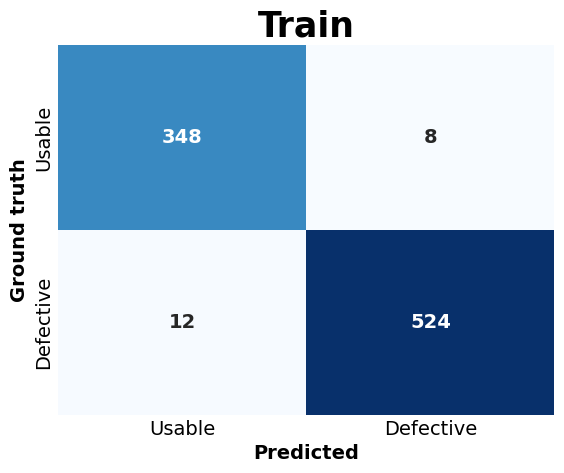

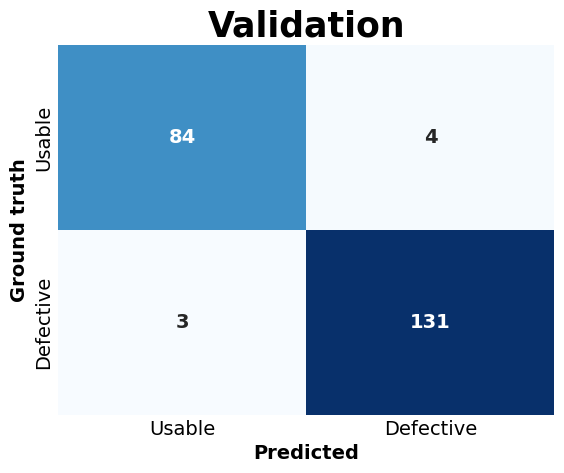

In [12]:
for name, set in zip(["Train", "Validation"], [train_set, val_set]):
    trainer.get_confusion_matrix(set, name, "qt")
    trainer.get_errors(set, name, "qt", draw_errors=DRAW)

# TEST DATASET

In [13]:
# test results.
test_set = trainer.test_set_gen()

Found 183 images belonging to 2 classes.
Test set:
 {'0_utilizavel': 0, '1_defeituoso': 1}


## FP model

12/12 [==============================] - 0s 22ms/step
fp_Test_Metrics
 {'fp_Test_recall': 0.9545454545454546, 'fp_Test_acc': 0.9562841530054644, 'fp_Test_precision': 0.9722222222222222}
Confusion matrix Test 
 [[ 70   3]
 [  5 105]]
12/12 [==============================] - 0s 22ms/step
Errors list Test 
 ['../dataset/resize_128/test/0_utilizavel/utiliza (448).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (472).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (517).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (680).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (687).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (706).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (735).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (773).jpeg']


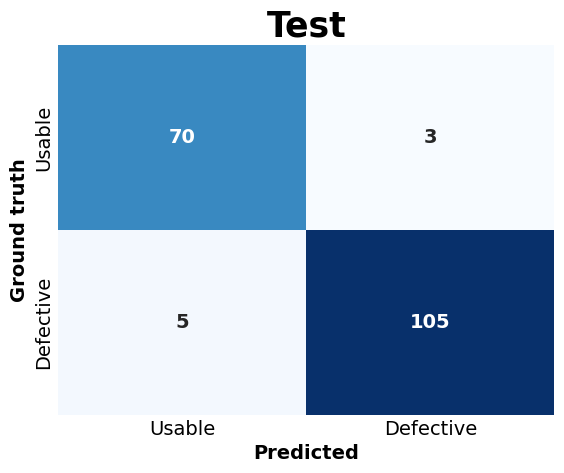

In [14]:
trainer.get_confusion_matrix(test_set, "Test", "fp")
trainer.get_errors(test_set, "Test", "fp", draw_errors=True)

## QT model

qt_Test_Metrics
 {'qt_Test_recall': 0.9545454545454546, 'qt_Test_acc': 0.9617486338797814, 'qt_Test_precision': 0.9813084112149533}
Confusion matrix Test 
 [[ 71   2]
 [  5 105]]
Errors list Test 
 ['../dataset/resize_128/test/0_utilizavel/utiliza (472).jpeg', '../dataset/resize_128/test/0_utilizavel/utiliza (517).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (687).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (706).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (735).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (773).jpeg', '../dataset/resize_128/test/1_defeituoso/defeito (778).jpeg']


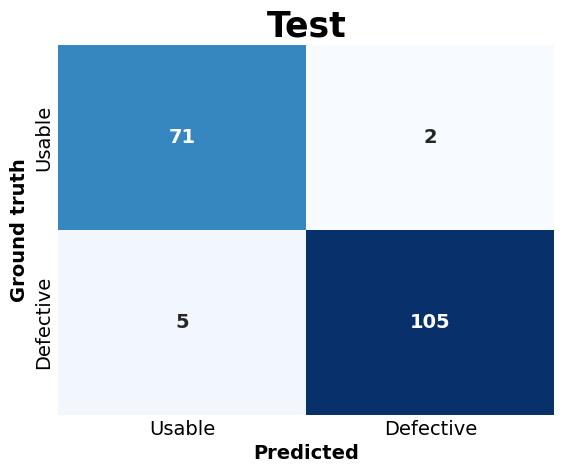

In [15]:
trainer.get_confusion_matrix(test_set, "Test", "qt")
trainer.get_errors(test_set, "Test", "qt", draw_errors=True)

# END LOGGER RUN

In [16]:
trainer.end_run()